# Classification MNIST

In this notebook, we will compare the performance of a few classification algorithms, using the popular MNIST dataset.  We will look at:
- Logistic regression
- Support vector machine
- Neural network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
y = pd.to_numeric(y)

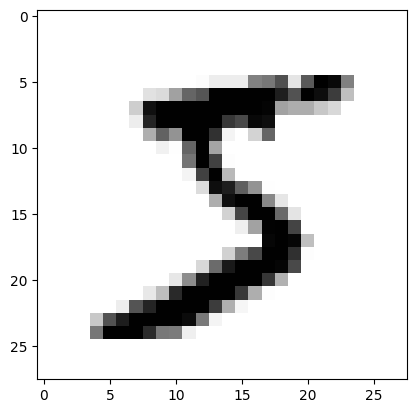

In [5]:
plt.imshow(X.iloc[0].values.reshape(28,28), cmap="binary")

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Logistic regression

In [7]:
from sklearn.linear_model import SGDClassifier

logit = SGDClassifier(loss='log_loss', random_state=42)
logit.fit(X_train, y_train)
y_train_pred_logit = logit.predict(X_train)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_train, y_train_pred_logit))
conf_mx_logit = confusion_matrix(y_train, y_train_pred_logit)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5923
           1       0.90      0.99      0.94      6742
           2       0.90      0.90      0.90      5958
           3       0.88      0.83      0.86      6131
           4       0.94      0.89      0.92      5842
           5       0.96      0.71      0.82      5421
           6       0.93      0.96      0.95      5918
           7       0.88      0.95      0.91      6265
           8       0.81      0.84      0.82      5851
           9       0.86      0.86      0.86      5949

    accuracy                           0.89     60000
   macro avg       0.90      0.89      0.89     60000
weighted avg       0.90      0.89      0.89     60000



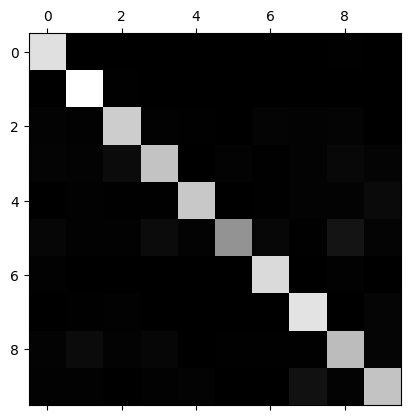

In [9]:
plt.matshow(conf_mx_logit, cmap=plt.cm.gray)

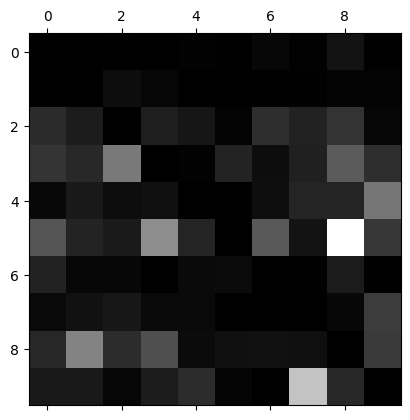

In [10]:
row_sums = conf_mx_logit.sum(axis=1, keepdims=True)  # count of true values for each digit
conf_mx_norm_logit = conf_mx_logit / row_sums
np.fill_diagonal(conf_mx_norm_logit, 0)
plt.matshow(conf_mx_norm_logit, cmap=plt.cm.gray)

## Support Vector Machine

In [11]:
svm = SGDClassifier()
svm.fit(X_train, y_train)
y_train_pred_svm = svm.predict(X_train)

In [12]:
print(classification_report(y_train, y_train_pred_svm))
conf_mx_svm = confusion_matrix(y_train, y_train_pred_svm)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5923
           1       0.98      0.95      0.97      6742
           2       0.94      0.79      0.86      5958
           3       0.82      0.87      0.84      6131
           4       0.96      0.82      0.88      5842
           5       0.82      0.87      0.84      5421
           6       0.91      0.96      0.93      5918
           7       0.95      0.89      0.92      6265
           8       0.66      0.91      0.77      5851
           9       0.87      0.81      0.84      5949

    accuracy                           0.88     60000
   macro avg       0.89      0.88      0.88     60000
weighted avg       0.89      0.88      0.88     60000



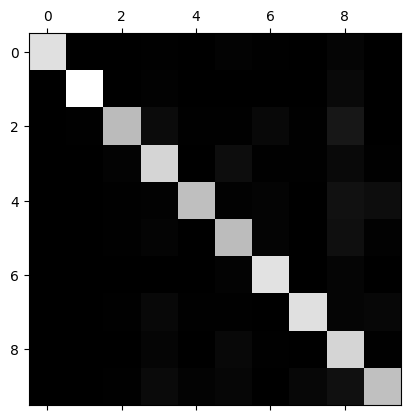

In [13]:
plt.matshow(conf_mx_svm, cmap=plt.cm.gray)

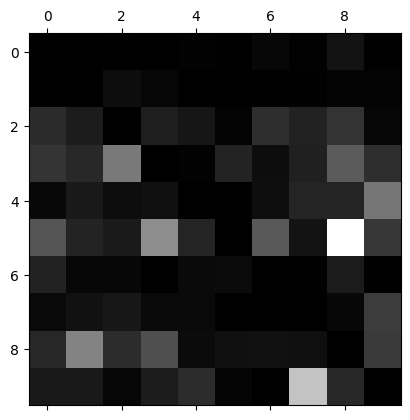

In [14]:
conf_mx_norm_logit = conf_mx_logit / row_sums
np.fill_diagonal(conf_mx_norm_logit, 0)
plt.matshow(conf_mx_norm_logit, cmap=plt.cm.gray)